In [28]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

%matplotlib inline


In [4]:
#2-2

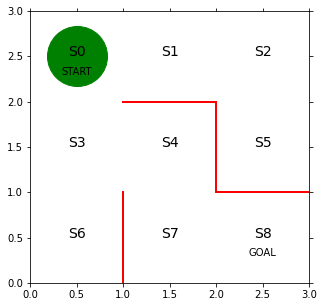

In [5]:
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 赤い壁を描く
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# 状態を示す文字S0～S8を描く
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 描画範囲の設定と目盛りを消す設定
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')

# 現在地S0に緑丸を描画する
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [6]:
#右から順に↑→↓←
theta_0 = np.array([
    [np.nan,1,1,np.nan],
    [np.nan,1,np.nan,1],
    [np.nan,np.nan,1,1],
    [1,1,1,np.nan],
    [np.nan,np.nan,1,1],
    [1,np.nan,np.nan,np.nan],
    [1,np.nan,np.nan,np.nan],
    [1,1,np.nan,np.nan],
    [np.nan,np.nan,np.nan,1]
])

In [21]:
def simple_convert_into_pi_from_theta(theta):
    [m,n] = theta.shape
    pi = np.zeros((m,n))
    for i in range(0,m):
        pi[i,:] = theta[i,:] / np.nansum(theta[i,:])
    pi = np.nan_to_num(pi)
    return pi

In [22]:
pi_0 = simple_convert_into_pi_from_theta(theta_0)

In [24]:
def get_next_s(pi, s):
    direction = ["up", "right","down","left"]
    next_direction = np.random.choice(direction, p=pi[s,:])
    if next_direction=="up":
        s_next=s-3
    elif next_direction=="right":
        s_next=s+1
    elif next_direction=="down":
        s_next=s+3
    elif next_direction=="left":
        s_next=s-1
    return s_next

In [25]:
def goal_maze(pi):
    s=0
    state_history=[0]
    while(1):
        next_s = get_next_s(pi, s)
        state_history.append(next_s)
        if next_s==8:
            break
        else:
            s=next_s
    return state_history

In [26]:
state_history = goal_maze(pi_0)

In [29]:
def init():
    line.set_data([],[])
    return (line,)

def animate(i):
    state=state_history[i]
    x =(state%3)+0.5
    y =2.5-int(state/3)
    line.set_data(x,y)
    return (line,)

In [33]:
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(state_history),interval=200, repeat=False)
HTML(anim.to_jshtml())

In [34]:
#2-3

In [37]:
def softmax_convert_into_pi_from_theta(theta):
    beta=1.0
    [m,n]=theta.shape
    pi = np.zeros((m,n))
    exp_theta = np.exp(beta*theta)
    for i in range(0,m):
        pi[i,:]=exp_theta[i,:]/np.nansum(exp_theta[i,:])
    pi = np.nan_to_num(pi)
    return pi

In [38]:
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
pi_0

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

In [40]:
def get_action_and_next_s(pi, s):
    direction = ["up", "right","down","left"]
    next_direction = np.random.choice(direction, p=pi[s,:])
    if next_direction=="up":
        s_next=s-3
        action=0
    elif next_direction=="right":
        s_next=s+1
        action=1
    elif next_direction=="down":
        s_next=s+3
        action=2
    elif next_direction=="left":
        s_next=s-1
        action=3
    return [action,s_next]

In [45]:
def goal_maze_ret_s_a(pi):
    s=0
    s_a_history = [[0, np.nan]]
    while(1):
        [action, next_s]= get_action_and_next_s(pi, s)
        s_a_history[-1][-1] = action
        s_a_history.append([next_s, None])
        if next_s==8:
            break
        else:
            s = next_s
    return s_a_history

In [46]:
s_a_history = goal_maze_ret_s_a(pi_0)

In [47]:
s_a_history

[[0, 1],
 [1, 1],
 [2, 2],
 [5, 0],
 [2, 3],
 [1, 1],
 [2, 3],
 [1, 1],
 [2, 3],
 [1, 3],
 [0, 2],
 [3, 1],
 [4, 2],
 [7, 0],
 [4, 3],
 [3, 0],
 [0, 1],
 [1, 1],
 [2, 3],
 [1, 3],
 [0, 1],
 [1, 1],
 [2, 2],
 [5, 0],
 [2, 3],
 [1, 1],
 [2, 2],
 [5, 0],
 [2, 3],
 [1, 1],
 [2, 3],
 [1, 3],
 [0, 1],
 [1, 1],
 [2, 2],
 [5, 0],
 [2, 3],
 [1, 1],
 [2, 3],
 [1, 1],
 [2, 2],
 [5, 0],
 [2, 2],
 [5, 0],
 [2, 3],
 [1, 1],
 [2, 3],
 [1, 1],
 [2, 3],
 [1, 1],
 [2, 2],
 [5, 0],
 [2, 2],
 [5, 0],
 [2, 3],
 [1, 1],
 [2, 3],
 [1, 3],
 [0, 2],
 [3, 1],
 [4, 3],
 [3, 0],
 [0, 2],
 [3, 1],
 [4, 2],
 [7, 0],
 [4, 2],
 [7, 1],
 [8, None]]

In [49]:
def update_theta(theta, pi, s_a_history):
    eta = 0.1
    T = len(s_a_history)-1
    [m,n] = theta.shape
    delta_theta = theta.copy()
    for i in range(0,m):
        for j in range(0,n):
            if not(np.isnan(theta[i][j])):
                SA_i = [SA for SA in s_a_history if SA[0]==i]
                SA_ij= [SA for SA in s_a_history if SA==[i,j]]
                N_i = len(SA_i)
                N_ij= len(SA_ij)
                delta_theta[i,j] = (N_ij-pi[i,j]*N_i)/T
    new_theta = theta + eta*delta_theta
    return new_theta

In [50]:
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
pi

array([[0.        , 0.50036765, 0.49963235, 0.        ],
       [0.        , 0.5036764 , 0.        , 0.4963236 ],
       [0.        , 0.        , 0.49779413, 0.50220587],
       [0.33349621, 0.33398701, 0.33251678, 0.        ],
       [0.        , 0.        , 0.50036765, 0.49963235],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.50036765, 0.49963235, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

In [52]:
stop_epsilon=10**-4
theta=theta_0
pi=pi_0
is_continue=True
count=1
while is_continue:
    s_a_history = goal_maze_ret_s_a(pi)
    new_theta = update_theta(theta, pi, s_a_history)
    new_pi = softmax_convert_into_pi_from_theta(new_theta)
    print(f'迷路を解くのにかかった時間は {len(s_a_history)-1}です')
    if np.sum(np.abs(new_pi-pi))<stop_epsilon:
        is_continue=False
    else:
        theta=new_theta
        pi=new_pi

迷路を解くのにかかった時間は 44です
迷路を解くのにかかった時間は 178です
迷路を解くのにかかった時間は 72です
迷路を解くのにかかった時間は 52です
迷路を解くのにかかった時間は 74です
迷路を解くのにかかった時間は 60です
迷路を解くのにかかった時間は 28です
迷路を解くのにかかった時間は 68です
迷路を解くのにかかった時間は 16です
迷路を解くのにかかった時間は 70です
迷路を解くのにかかった時間は 66です
迷路を解くのにかかった時間は 28です
迷路を解くのにかかった時間は 26です
迷路を解くのにかかった時間は 24です
迷路を解くのにかかった時間は 30です
迷路を解くのにかかった時間は 16です
迷路を解くのにかかった時間は 28です
迷路を解くのにかかった時間は 24です
迷路を解くのにかかった時間は 36です
迷路を解くのにかかった時間は 16です
迷路を解くのにかかった時間は 6です
迷路を解くのにかかった時間は 38です
迷路を解くのにかかった時間は 168です
迷路を解くのにかかった時間は 30です
迷路を解くのにかかった時間は 124です
迷路を解くのにかかった時間は 26です
迷路を解くのにかかった時間は 8です
迷路を解くのにかかった時間は 18です
迷路を解くのにかかった時間は 66です
迷路を解くのにかかった時間は 8です
迷路を解くのにかかった時間は 68です
迷路を解くのにかかった時間は 132です
迷路を解くのにかかった時間は 38です
迷路を解くのにかかった時間は 92です
迷路を解くのにかかった時間は 106です
迷路を解くのにかかった時間は 36です
迷路を解くのにかかった時間は 20です
迷路を解くのにかかった時間は 32です
迷路を解くのにかかった時間は 40です
迷路を解くのにかかった時間は 260です
迷路を解くのにかかった時間は 64です
迷路を解くのにかかった時間は 170です
迷路を解くのにかかった時間は 24です
迷路を解くのにかかった時間は 4です
迷路を解くのにかかった時間は 8です
迷路を解くのにかかった時間は 14です
迷路を解くのにかかった時間は 26です
迷路を解くのにかかった時間は 98です
迷路を解くのにかかった時間は 80です
迷路を解くのにかかった時間は 84で

In [55]:
pi

array([[0.        , 0.0156619 , 0.9843381 , 0.        ],
       [0.        , 0.28680596, 0.        , 0.71319404],
       [0.        , 0.        , 0.4047143 , 0.5952857 ],
       [0.00821033, 0.98173442, 0.01005525, 0.        ],
       [0.        , 0.        , 0.98279433, 0.01720567],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.01499215, 0.98500785, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

In [56]:
#2.5 sarsa

In [128]:
[a,b] = theta_0.shape
Q = np.random.rand(a,b)*theta_0
Q

array([[       nan, 0.98677379, 0.60649596,        nan],
       [       nan, 0.9084085 ,        nan, 0.81783372],
       [       nan,        nan, 0.64996204, 0.56375721],
       [0.93755929, 0.56617189, 0.10022939,        nan],
       [       nan,        nan, 0.43256398, 0.61479151],
       [0.35912193,        nan,        nan,        nan],
       [0.13840765,        nan,        nan,        nan],
       [0.70219729, 0.07808591,        nan,        nan],
       [       nan,        nan,        nan, 0.84134704]])

In [129]:
pi_0 = simple_convert_into_pi_from_theta(Q)
pi_0

array([[0.        , 0.61933881, 0.38066119, 0.        ],
       [0.        , 0.52623467, 0.        , 0.47376533],
       [0.        , 0.        , 0.53551267, 0.46448733],
       [0.58452764, 0.35298367, 0.06248868, 0.        ],
       [0.        , 0.        , 0.41300588, 0.58699412],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.89992619, 0.10007381, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

In [130]:
#ε-greedy法
def get_action(s, Q, epsilon, pi_0):
    direction =["up","right","down","left"]
    if np.random.rand()<epsilon:
        next_direction = np.random.choice(direction, p=pi_0[s,:])
    else:
        next_direction = direction[np.nanargmax(Q[s,:])]
        
    if next_direction=="up":
        action=0
    elif next_direction=="right":
        action=1
    elif next_direction=="down":
        action=2
    elif next_direction=="left":
        action=3
    return action




def get_s_next(s,a,Q,epsilon, pi_0):
    direction =["up","right","down","left"]
    next_direction = direction[a]
    
    if next_direction=="up":
        s_next = s-3
    elif next_direction=="right":
        s_next = s+1
    elif next_direction=="down":
        s_next = s+3
    elif next_direction=="left":
        s_next = s-1
        
    return s_next

In [131]:
def Sarsa(s,a,r,s_next,a_next, Q, eta, gamma):
    if s_next==8:
        Q[s,a]=Q[s,a]+eta*(r-Q[s,a])
    else:
        Q[s,a]=Q[s,a]+eta*(r+ gamma*Q[s_next, a_next] - Q[s,a])
    return Q

def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    s=0
    a=a_next=get_action(s, Q,epsilon, pi)
    s_a_history = [[0, np.nan]]
    
    while(1):
        a=a_next
        s_a_history[-1][-1]=a
        s_next=get_s_next(s,a,Q,epsilon,pi)
        s_a_history.append([s_next, np.nan])
        if s_next==8:
            r=1
        else:
            r=0
            a_next=get_action(s_next, Q, epsilon,pi)
        
        Q = Sarsa(s,a,r,s_next,a_next,Q,eta,gamma)
        if s_next==8:
            break
        else:
            s=s_next
    return [s_a_history, Q]

In [132]:
eta=0.1
gamma=0.9
epsilon=0.5
v = np.nanmax(Q, axis=1)
is_continue=True
episode=1
pi=pi_0
for j in range(1,101):
    print(f'episode {j}-----')
    epsilon = epsilon/2
    [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi)
    new_v = np.nanmax(Q, axis=1)
    print(np.sum(np.abs(new_v-v)))
    v=new_v
    print(f'step {len(s_a_history)-1}')
    

episode 1-----
1.4157711510268687
step 244
episode 2-----
2.448176259040471
step 1168
episode 3-----
0.10728521786677916
step 34
episode 4-----
0.09971195752716419
step 22
episode 5-----
0.08298716374571952
step 10
episode 6-----
0.0740477543295214
step 4
episode 7-----
0.08073278967294309
step 10
episode 8-----
0.07934641510748214
step 10
episode 9-----
0.0714573054421083
step 4
episode 10-----
0.07557726360066727
step 10
episode 11-----
0.06935014264592598
step 4
episode 12-----
0.06857778271885584
step 4
episode 13-----
0.0677457411015786
step 4
episode 14-----
0.06684917677551447
step 4
episode 15-----
0.06588492045637218
step 4
episode 16-----
0.06485141232430094
step 4
episode 17-----
0.06374858969016947
step 4
episode 18-----
0.0625777421568732
step 4
episode 19-----
0.06134134789675627
step 4
episode 20-----
0.060042901456478864
step 4
episode 21-----
0.05868674089881035
step 4
episode 22-----
0.05727787999504702
step 4
episode 23-----
0.05582184950598154
step 4
episode 24-----

In [123]:
#2.6 Q学習 sarsaとの違いはQの変更式

In [133]:
def Q_learning(s,a,r,s_next, Q, eta, gamma):
    if s_next==8:
        Q[s,a] = Q[s,a]+eta*(r-Q[s,a])
    else:
        Q[s,a] = Q[s,a]+eta*(r+gamma*np.nanmax(Q[s_next])-Q[s,a])
    return Q

In [137]:
[a,b]=theta_0.shape
Q = np.random.rand(a,b)*theta_0*0.1
eta=0.1
gamma = 0.9
epsilon=0.5
v=np.nanmax(Q, axis=1)
is_continue=True
episode=1

V=[]
V.append(np.nanmax(Q, axis=1))

for episode in range(1,101):
    print(f'-------epsode: {episode}--------')
    epsilon=epsilon/2
    [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)
    new_v = np.nanmax(Q, axis=1)
    print(np.sum(np.sum(new_v-v)))
    v = new_v
    V.append(v)
    print(f'steps :{len(s_a_history)-1}')

-------epsode: 1--------
-0.005968024077638551
steps :132
-------epsode: 2--------
0.05878467690842908
steps :86
-------epsode: 3--------
0.06425971225885596
steps :66
-------epsode: 4--------
0.09006298326321499
steps :6
-------epsode: 5--------
0.08973833715498056
steps :4
-------epsode: 6--------
0.0888262936520984
steps :4
-------epsode: 7--------
0.08788452146103323
steps :4
-------epsode: 8--------
0.08690305194885688
steps :4
-------epsode: 9--------
0.08587236199739942
steps :4
-------epsode: 10--------
0.08478400403442474
steps :4
-------epsode: 11--------
0.08363100016885044
steps :4
-------epsode: 12--------
0.08240805620132925
steps :4
-------epsode: 13--------
0.08111164056206076
steps :4
-------epsode: 14--------
0.0797399643303406
steps :4
-------epsode: 15--------
0.0782928911299041
steps :4
-------epsode: 16--------
0.0767717996274764
steps :4
-------epsode: 17--------
0.07517941638208628
steps :4
-------epsode: 18--------
0.07351963272363936
steps :4
-------epsode: 19

In [140]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import matplotlib.cm as cm

def init():
    line.set_data([],[])
    return (line, )

def animate(i):
    # フレームごとの描画内容
    # 各マスに状態価値の大きさに基づく色付きの四角を描画
    line, = ax.plot([0.5], [2.5], marker="s",
                    color=cm.jet(V[i][0]), markersize=85)  # S0
    line, = ax.plot([1.5], [2.5], marker="s",
                    color=cm.jet(V[i][1]), markersize=85)  # S1
    line, = ax.plot([2.5], [2.5], marker="s",
                    color=cm.jet(V[i][2]), markersize=85)  # S2
    line, = ax.plot([0.5], [1.5], marker="s",
                    color=cm.jet(V[i][3]), markersize=85)  # S3
    line, = ax.plot([1.5], [1.5], marker="s",
                    color=cm.jet(V[i][4]), markersize=85)  # S4
    line, = ax.plot([2.5], [1.5], marker="s",
                    color=cm.jet(V[i][5]), markersize=85)  # S5
    line, = ax.plot([0.5], [0.5], marker="s",
                    color=cm.jet(V[i][6]), markersize=85)  # S6
    line, = ax.plot([1.5], [0.5], marker="s",
                    color=cm.jet(V[i][7]), markersize=85)  # S7
    line, = ax.plot([2.5], [0.5], marker="s",
                    color=cm.jet(1.0), markersize=85)  # S8
    return (line,)


#　初期化関数とフレームごとの描画関数を用いて動画を作成
anim = animation.FuncAnimation(
    fig, animate, init_func=init, frames=len(V), interval=200, repeat=False)

HTML(anim.to_jshtml())